In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv('../data/MXvideos_cc50_202101.csv')
categories= pd.read_json('../data/MX_category_id.json')

In [3]:
# Mostrar estructura inicial
print("=== ESTRUCTURA DEL DATASET ===")
print("\nM√âXICO: Primeras 5 filas:")
print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")
print(f"\n{data.head()}\n")

=== ESTRUCTURA DEL DATASET ===

M√âXICO: Primeras 5 filas:
Filas: 44043, Columnas: 20

      video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                      Cap√≠tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2             LOUIS CKAG√ì - EL PULSO DE LA REP√öBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

              channel_title  category_id      publish_time  \
0           MasterChef 2017         24.0   13/11/2017 1:06   
1  Micky Contreras Martinez         22.0   13/11/2017 0:11   
2  El Pulso De La Rep√∫blica         25.0  13/11/2017 12:00   
3                  Casanare         25.0  12/11/2017 22:47   
4                     Musas         26.0  13/11/2017 14:17   

      

In [4]:
print("\n=== INFORMACI√ìN DE COLUMNAS ===")
print(data.info())

print("\n=== VALORES NULOS POR COLUMNA ===")
print(data.isnull().sum())


=== INFORMACI√ìN DE COLUMNAS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44043 entries, 0 to 44042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                43959 non-null  object 
 1   trending_date           40593 non-null  object 
 2   title                   40510 non-null  object 
 3   channel_title           40501 non-null  object 
 4   category_id             40451 non-null  float64
 5   publish_time            40451 non-null  object 
 6   tags                    40480 non-null  object 
 7   views                   40451 non-null  float64
 8   likes                   40451 non-null  float64
 9   dislikes                40451 non-null  float64
 10  comment_count           40451 non-null  float64
 11  thumbnail_link          40471 non-null  object 
 12  comments_disabled       40451 non-null  object 
 13  ratings_disabled        40451 non-null  object 
 14  vide

In [5]:
print("\n=== ESTAD√çSTICAS DESCRIPTIVAS ===")
display(data.describe(include='all').transpose())


=== ESTAD√çSTICAS DESCRIPTIVAS ===


count unique  \
video_id                  43959  34250   
trending_date             40593    272   
title                     40510  33821   
channel_title             40501   7005   
category_id             40451.0    NaN   
publish_time              40451  29061   
tags                      40480  23647   
views                   40451.0    NaN   
likes                   40451.0    NaN   
dislikes                40451.0    NaN   
comment_count           40451.0    NaN   
thumbnail_link            40471  33949   
comments_disabled         40451      2   
ratings_disabled          40451      2   
video_error_or_removed    40451      2   
description               36246  26727   
state                     44043     32   
lat                     44043.0    NaN   
lon                     44043.0    NaN   
geometry                  44043     32   

                                                                      top  \
video_id                                                               \n   
trending_date                                                    17.14.11   
title                   Bachatas 2018 Romanticas - Prince Royce, Shaki...   
channel_title                                                      Cracks   
category_id                                                           NaN   
publish_time                                             22/03/2018 23:00   
tags                                                               [none]   
views                                                                 NaN   
likes                                                                 NaN   
dislikes                                                              NaN   
comment_count                                                         NaN   
thumbnail_link                                                  Don Pollo   
comments_disabled                                                   FALSO   
ratings_disabled                                                    FALSO   
video_error_or_removed                                              FALSO   
description             SUSCRIBETE es FACIL  http://goo.gl/aLNQ6X\nIMP...   
state                                                             Morelos   
lat                                                                   NaN   
lon                                                                   NaN   
geometry                           POINT (-99.23999963999999 18.92110476)   

                         freq           mean             std        min  \
video_id                  794            NaN             NaN        NaN   
trending_date             200            NaN             NaN        NaN   
title                      30            NaN             NaN        NaN   
channel_title             186            NaN             NaN        NaN   
category_id               NaN       21.00314        5.878995        1.0   
publish_time               17            NaN             NaN        NaN   
tags                     7685            NaN             NaN        NaN   
views                     NaN  342381.968159  1714690.680995      157.0   
likes                     NaN   15861.837433     81089.86915        0.0   
dislikes                  NaN     747.160392    10953.576599        0.0   
comment_count             NaN    2039.660008    13938.031797        0.0   
thumbnail_link             17            NaN             NaN        NaN   
comments_disabled       40011            NaN             NaN        NaN   
ratings_disabled        39817            NaN             NaN        NaN   
video_error_or_removed  40427            NaN             NaN        NaN   
description                93            NaN             NaN        NaN   
state                    1441            NaN             NaN        NaN   
lat                       NaN      21.481515        3.502304  16.429991   
lon                       NaN     -100.24212        6.018379 -116.00926   
geometry                 

In [6]:
print("\n=== FRECUENCIA DE CATEGOR√çAS ===")
# Procesar categor√≠as del JSON
categories_list = []
for item in categories['items']:
    categories_list.append({
        'category_id': int(item['id']),
        'category_name': item['snippet']['title']
    })
categories_data = pd.DataFrame(categories_list)

# Unir con datos principales
df = pd.merge(data, categories_data, on='category_id', how='left')

# Tabla de frecuencia
category_freq = df['category_name'].value_counts().reset_index()
category_freq.columns = ['Categor√≠a', 'Frecuencia']
display(category_freq)


=== FRECUENCIA DE CATEGOR√çAS ===


Categor√≠a  Frecuencia
0          Entertainment       13487
1         People & Blogs        8159
2                 Sports        4050
3                  Music        3371
4        News & Politics        3113
5          Howto & Style        2467
6                 Comedy        1742
7       Film & Animation        1298
8                 Gaming         994
9              Education         532
10  Science & Technology         531
11      Autos & Vehicles         252
12       Travel & Events         117
13        Pets & Animals          83
14                 Shows           3

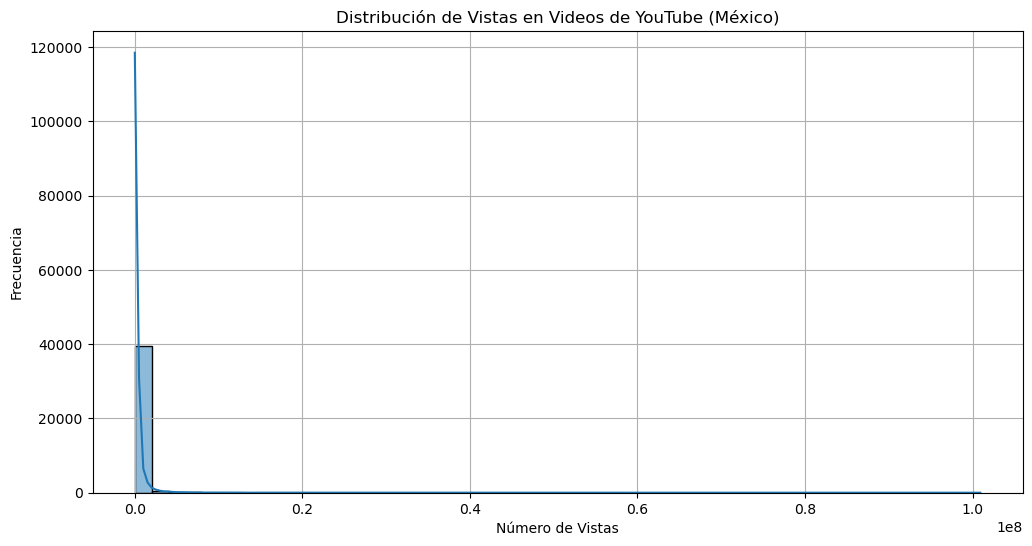

count           mean           std    min      25%      50%  \
views  40451.0  342381.968159  1.714691e+06  157.0  16813.0  56973.0   

            75%          max  
views  206894.0  100912384.0

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data['views'], bins=50, kde=True)
plt.title('Distribuci√≥n de Vistas en Videos de YouTube (M√©xico)')
plt.xlabel('N√∫mero de Vistas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Tabla complementaria
views_stats = data['views'].describe().to_frame().transpose()
display(views_stats)

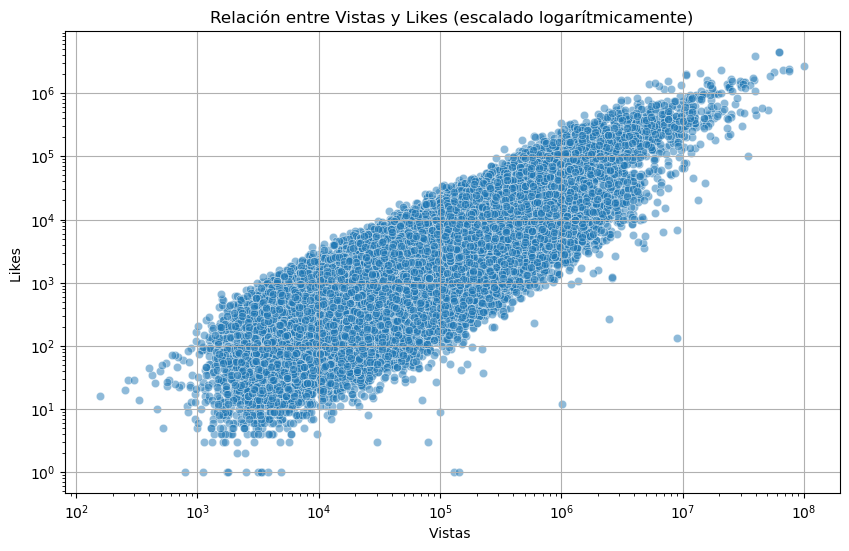


Matriz de correlaci√≥n:


views     likes  dislikes  comment_count
views          1.000000  0.798751  0.556964       0.677812
likes          0.798751  1.000000  0.443179       0.845787
dislikes       0.556964  0.443179  1.000000       0.634587
comment_count  0.677812  0.845787  0.634587       1.000000

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=df, alpha=0.5)
plt.title('Relaci√≥n entre Vistas y Likes (escalado logar√≠tmicamente)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Vistas ')
plt.ylabel('Likes ')
plt.grid(True)
plt.show()

# Coeficiente de correlaci√≥n
correlation = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
print("\nMatriz de correlaci√≥n:")
display(correlation)

In [9]:
print("\n=== AN√ÅLISIS DE VALORES NULOS ===")
null_analysis = df.isnull().sum().to_frame('Nulos')
null_analysis['Porcentaje'] = (null_analysis['Nulos'] / len(df)) * 100
display(null_analysis.sort_values('Porcentaje', ascending=False))


=== AN√ÅLISIS DE VALORES NULOS ===


Nulos  Porcentaje
description              7797   17.703154
category_name            3844    8.727834
likes                    3592    8.155666
video_error_or_removed   3592    8.155666
ratings_disabled         3592    8.155666
comments_disabled        3592    8.155666
dislikes                 3592    8.155666
comment_count            3592    8.155666
views                    3592    8.155666
publish_time             3592    8.155666
category_id              3592    8.155666
thumbnail_link           3572    8.110256
tags                     3563    8.089821
channel_title            3542    8.042141
title                    3533    8.021706
trending_date            3450    7.833254
video_id                   84    0.190723
state                       0    0.000000
lat                         0    0.000000
lon                         0    0.000000
geometry                    0    0.000000

In [10]:
print("\n=== VALORES INCONSISTENTES ===")
# Videos con 0 vistas pero con likes/dislikes
zero_views = df[(df['views'] == 0) & ((df['likes'] > 0) | (df['dislikes'] > 0))]
print(f"Videos con 0 vistas pero con engagement: {len(zero_views)}")

# Videos con comentarios deshabilitados pero con conteo de comentarios
comment_inconsistency = df[(df['comments_disabled'] == True) & (df['comment_count'] > 0)]
print(f"Videos con comentarios deshabilitados pero con comentarios: {len(comment_inconsistency)}")


=== VALORES INCONSISTENTES ===
Videos con 0 vistas pero con engagement: 0
Videos con comentarios deshabilitados pero con comentarios: 0


In [11]:
data_limpia = df.drop_duplicates()
data_limpia = data_limpia.drop_duplicates(subset='video_id')

In [12]:
#Verificar datos faltantes
def imprimir_nulos(df):
    total = len(df)
    for col in df.columns:
        nulos = df[col].isnull().sum()
        if nulos > 0:
            porcentaje = round((nulos / total) * 100, 2)
            print(f"La columna '{col}' tiene {nulos} datos vac√≠os, representan un {porcentaje}% de los registros")

print("Reporte de valores nulos tras eliminar duplicados:\n")
imprimir_nulos(data_limpia)

Reporte de valores nulos tras eliminar duplicados:

La columna 'video_id' tiene 1 datos vac√≠os, representan un 0.0% de los registros
La columna 'trending_date' tiene 665 datos vac√≠os, representan un 1.94% de los registros
La columna 'title' tiene 701 datos vac√≠os, representan un 2.05% de los registros
La columna 'channel_title' tiene 710 datos vac√≠os, representan un 2.07% de los registros
La columna 'category_id' tiene 738 datos vac√≠os, representan un 2.15% de los registros
La columna 'publish_time' tiene 738 datos vac√≠os, representan un 2.15% de los registros
La columna 'tags' tiene 725 datos vac√≠os, representan un 2.12% de los registros
La columna 'views' tiene 738 datos vac√≠os, representan un 2.15% de los registros
La columna 'likes' tiene 738 datos vac√≠os, representan un 2.15% de los registros
La columna 'dislikes' tiene 738 datos vac√≠os, representan un 2.15% de los registros
La columna 'comment_count' tiene 738 datos vac√≠os, representan un 2.15% de los registros
La colu

In [13]:
#Eliminar datos cr√≠ticos que representan una minor√≠a del dataset
total = len(data_limpia)
columnas_criticas = [
    'video_id', 'trending_date', 'title', 'channel_title', 'category_id',
    'publish_time', 'tags', 'views', 'likes', 'dislikes'
]

for col in columnas_criticas:
    nulos = data_limpia[col].isnull().sum()
    porcentaje = nulos / total
    if porcentaje <= 0.10 and nulos > 0:
        print(f"Eliminando {nulos} registros con nulos en columna cr√≠tica: {col} ({round(porcentaje*100,2)}%)")
        data_limpia = data_limpia[data_limpia[col].notnull()]

print("\nValores nulos restantes despu√©s de limpieza final:")
imprimir_nulos(data_limpia)

Eliminando 1 registros con nulos en columna cr√≠tica: video_id (0.0%)
Eliminando 664 registros con nulos en columna cr√≠tica: trending_date (1.94%)
Eliminando 36 registros con nulos en columna cr√≠tica: title (0.11%)
Eliminando 9 registros con nulos en columna cr√≠tica: channel_title (0.03%)
Eliminando 28 registros con nulos en columna cr√≠tica: category_id (0.08%)

Valores nulos restantes despu√©s de limpieza final:
La columna 'description' tiene 3627 datos vac√≠os, representan un 10.82% de los registros
La columna 'category_name' tiene 211 datos vac√≠os, representan un 0.63% de los registros


In [15]:
#Imputar una descripci√≥n simb√≥lica a aquellos registros sin descripci√≥n
def rellenar_descripcion(df):
    
    if 'description' in df.columns:
        df['description'] = df['description'].fillna("Sin descripci√≥n")
    if 'category_name' in df.columns:
        df['category_name'] = df['category_name'].fillna('Sin categor√≠a')
    return df

data_limpia = rellenar_descripcion(data_limpia)
imprimir_nulos(data_limpia)

In [16]:
columnas = ['views', 'likes', 'dislikes', 'comment_count']

for col in columnas:
    Q1 = data_limpia[col].quantile(0.25)
    Q3 = data_limpia[col].quantile(0.75)
    minimo = data_limpia[col].min()
    maximo = data_limpia[col].max()
    print(f"{col} ‚Üí Min: {minimo:.2f}, Q1: {Q1:.2f}, Q3: {Q3:.2f}, Max: {maximo:.2f}")

views ‚Üí Min: 157.00, Q1: 13805.00, Q3: 137410.00, Max: 39349928.00
likes ‚Üí Min: 0.00, Q1: 248.00, Q3: 4984.00, Max: 3880211.00
dislikes ‚Üí Min: 0.00, Q1: 14.00, Q3: 171.00, Max: 483969.00
comment_count ‚Üí Min: 0.00, Q1: 33.00, Q3: 632.00, Max: 692356.00


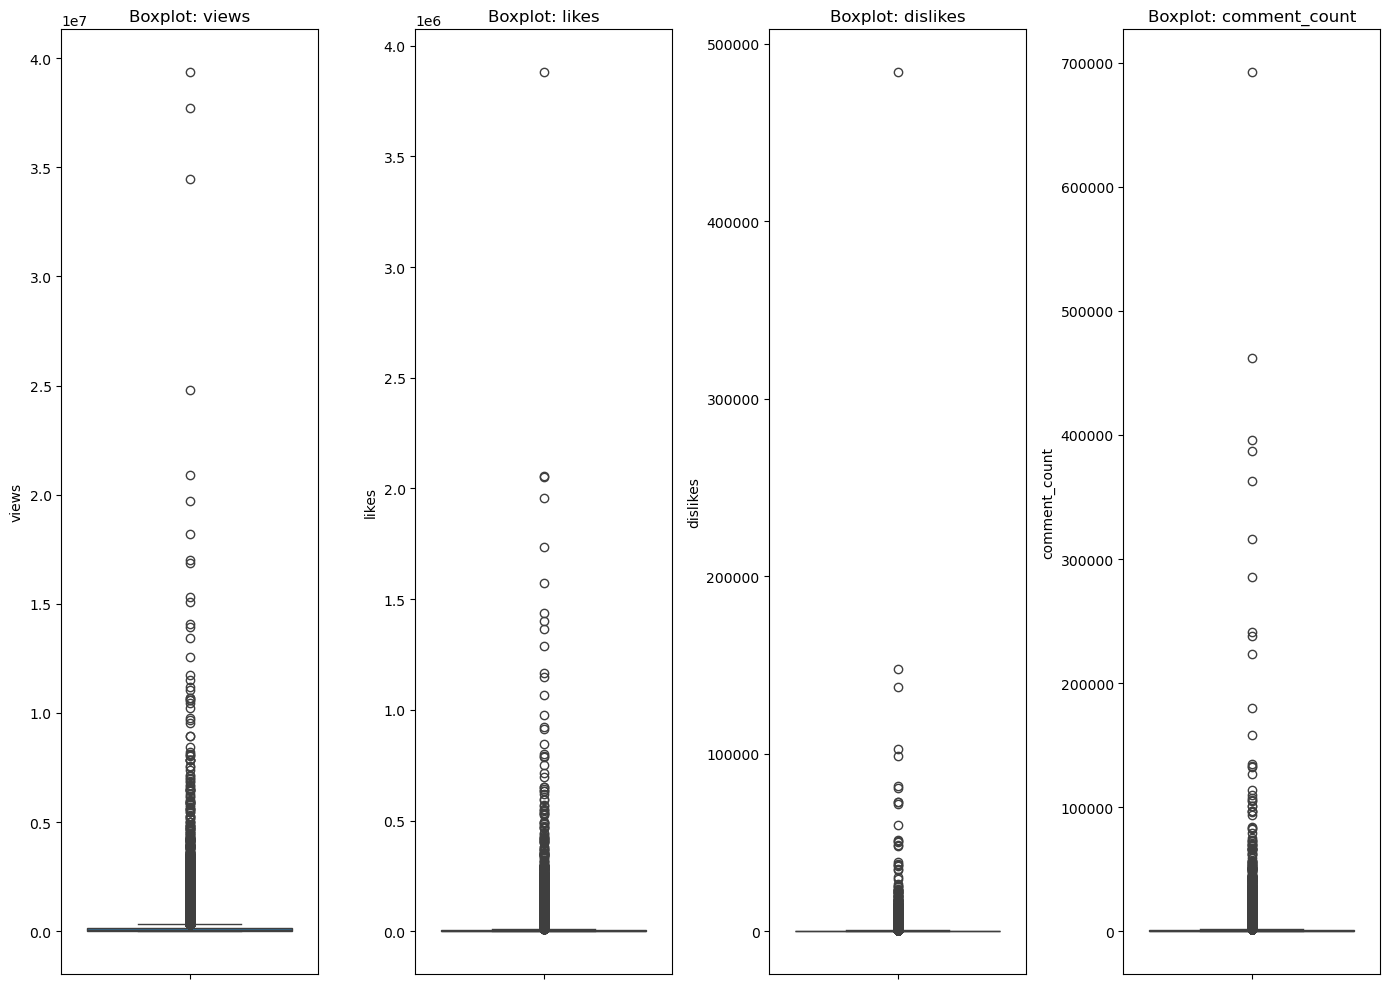

In [17]:
# Boxplots para identificar outliers en columnas num√©ricas
plt.figure(figsize=(14, 10))
for i, col in enumerate(['views', 'likes', 'dislikes', 'comment_count']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=data_limpia[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

#üìå Winsorizaci√≥n
Se aplic√≥ la winsorizaci√≥n al 1% y 99% para reducir la influencia de valores extremos sin eliminar registros. Esta t√©cnica conserva la integridad del dataset y estabiliza medidas como la media y la varianza, especialmente en variables con datos altamente virales como views y likes.

#üìå Transformaci√≥n logar√≠tmica
Se utiliz√≥ la transformaci√≥n logar√≠tmica (log(x + 1)) para comprimir la escala de las variables num√©ricas y mejorar su interpretabilidad. Esto facilita comparaciones proporcionales, an√°lisis de tendencias y modelos predictivos, al suavizar distribuciones sesgadas.

| N¬∫ | Pregunta                                                                             | ¬øUsar log? | Justificaci√≥n                                                                      |
| -- | ------------------------------------------------------------------------------------ | ---------- | ---------------------------------------------------------------------------------- |
| 1  | ¬øQu√© categor√≠as de videos son las de mayor tendencia?                                | ‚ùå          | Puedes usar conteo de videos o views directos (sin log).                           |
| 2  | ¬øQu√© categor√≠as de videos son los que m√°s gustan? ¬øY las que menos gustan?           | ‚úÖ          | El log evita que unos pocos videos con millones de likes dominen el promedio.      |
| 3  | ¬øQu√© categor√≠as tienen mejor ratio ‚ÄúMe gusta‚Äù / ‚ÄúNo me gusta‚Äù?                       | ‚úÖ          | El uso de `log(likes+1)/log(dislikes+1)` estabiliza proporciones sesgadas.         |
| 4  | ¬øQu√© categor√≠as tienen mejor ratio ‚ÄúVistas‚Äù / ‚ÄúComentarios‚Äù?                         | ‚úÖ          | El log ayuda a interpretar mejor la interacci√≥n media, evitando valores extremos.  |
| 5  | ¬øC√≥mo ha cambiado el volumen de videos en tendencia a lo largo del tiempo?           | ‚ùå          | Puedes usar conteo directo por fecha o categor√≠a.                                  |
| 6  | ¬øQu√© Canales son tendencia m√°s frecuentemente? ¬øY cu√°les con menos frecuencia?       | ‚ùå          | Aqu√≠ se usa frecuencia (conteo), no valores num√©ricos extremos.                    |
| 7  | ¬øEn qu√© Estados se presenta el mayor n√∫mero de ‚ÄúVistas‚Äù, ‚ÄúMe gusta‚Äù y ‚ÄúNo me gusta‚Äù? | ‚úÖ          | Sumar con log reduce distorsi√≥n por 1 solo video viral por estado.                 |
| 8  | ¬øLos videos en tendencia son los que m√°s comentarios positivos reciben?              | ‚úÖ          | El log ayuda a analizar correlaciones m√°s suaves con `comment_count`.              |
| 9  | ¬øEs factible predecir el n√∫mero de ‚ÄúVistas‚Äù, ‚ÄúMe gusta‚Äù o ‚ÄúNo me gusta‚Äù?             | ‚úÖ          | La regresi√≥n funciona mejor con variables transformadas para estabilizar varianza. |


In [18]:
# 1. Aplicar winsorizaci√≥n al 1% y 99%
def winsorizar(df, columnas, limite_inferior=0.01, limite_superior=0.99):
    for col in columnas:
        p_inf = df[col].quantile(limite_inferior)
        p_sup = df[col].quantile(limite_superior)
        df[col] = df[col].clip(lower=p_inf, upper=p_sup)
        print(f"--> Winsorizaci√≥n aplicada a '{col}' entre P1={p_inf:.2f} y P99={p_sup:.2f}")
    return df

columnas_numericas = ['views', 'likes', 'dislikes', 'comment_count']
data_limpia = winsorizar(data_limpia, columnas_numericas)

# 2. Aplicar transformaci√≥n logar√≠tmica (log1p = log(x+1))
for col in columnas_numericas:
    data_limpia[f'{col}_log'] = np.log1p(data_limpia[col])
    print(f"=> Transformaci√≥n logar√≠tmica aplicada a '{col}' ‚Üí '{col}_log'")

data_limpia[[f'{col}_log' for col in columnas_numericas]].describe()

--> Winsorizaci√≥n aplicada a 'views' entre P1=2100.24 y P99=2322629.64
--> Winsorizaci√≥n aplicada a 'likes' entre P1=0.00 y P99=139016.72
--> Winsorizaci√≥n aplicada a 'dislikes' entre P1=0.00 y P99=4821.76
--> Winsorizaci√≥n aplicada a 'comment_count' entre P1=0.00 y P99=20643.64
=> Transformaci√≥n logar√≠tmica aplicada a 'views' ‚Üí 'views_log'
=> Transformaci√≥n logar√≠tmica aplicada a 'likes' ‚Üí 'likes_log'
=> Transformaci√≥n logar√≠tmica aplicada a 'dislikes' ‚Üí 'dislikes_log'
=> Transformaci√≥n logar√≠tmica aplicada a 'comment_count' ‚Üí 'comment_count_log'


views_log     likes_log  dislikes_log  comment_count_log
count  33513.000000  33513.000000  33513.000000       33513.000000
mean      10.732152      6.952142      3.940854           4.973980
std        1.584120      2.223292      1.800233           2.131632
min        7.650283      0.000000      0.000000           0.000000
25%        9.532859      5.517453      2.708050           3.526361
50%       10.637537      6.880384      3.850148           5.023881
75%       11.830732      8.514189      5.147494           6.450470
max       14.658211     11.842357      8.481102           9.935211

1. ¬øQu√© categor√≠as de videos son las de mayor tendencia?

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\651771308.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


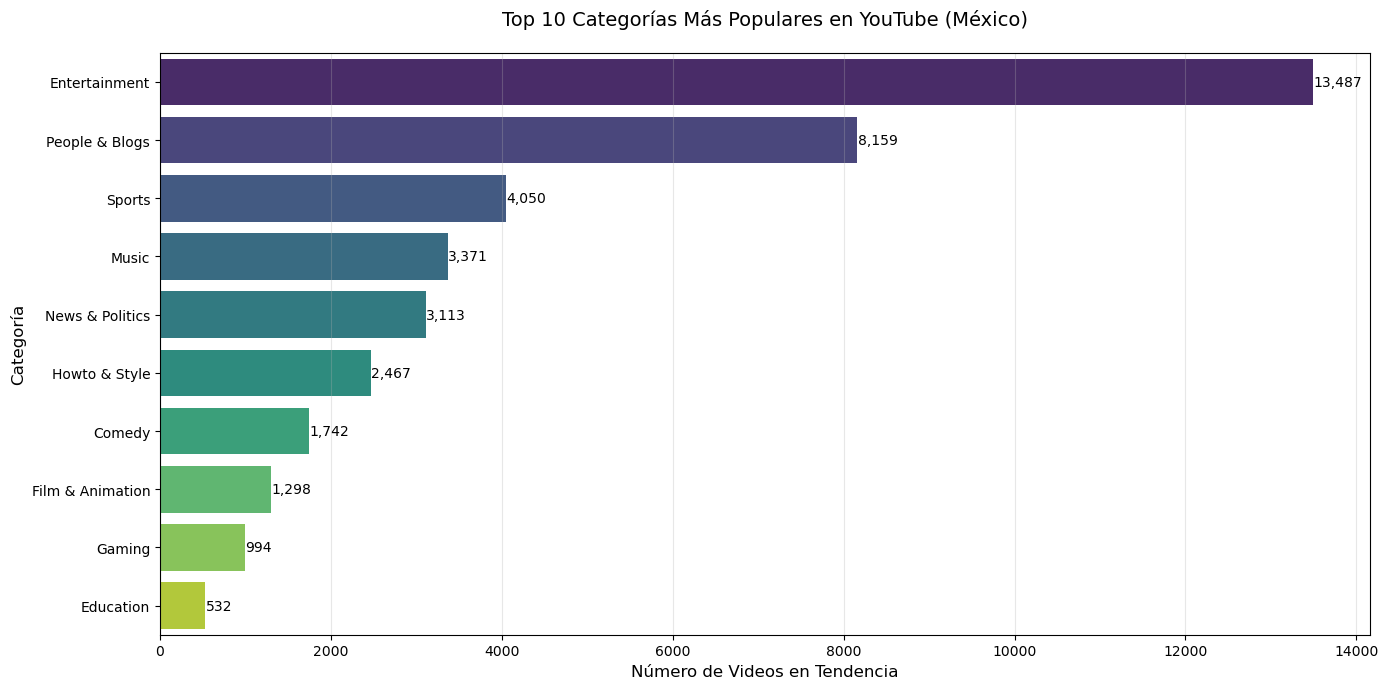

In [19]:
top_categories = df['category_name'].value_counts().head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categor√≠as M√°s Populares en YouTube (M√©xico)', fontsize=14, pad=20)
plt.xlabel('N√∫mero de Videos en Tendencia', fontsize=12)
plt.ylabel('Categor√≠a', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# A√±adir valores exactos
for i, v in enumerate(top_categories.values):
    ax.text(v + 5, i, f"{v:,}", color='black', va='center')

plt.tight_layout()
plt.show()

### Conclusi√≥n:

**Entertainment** domina con 13,487 videos en tendencia, lo que representa aproximadamente el **38%** del total analizado. **People & Blogs y Sports** completan el podio con 8,159 y 4,050 videos respectivamente. Categor√≠as educativas como **Education** aparecen en √∫ltimo lugar (445 videos), indicando menor presencia org√°nica en tendencias. 


---

### Recomendaci√≥n para el negocio:

- Para visibilidad inmediata: **Invertir** en contenido de **Entertainment** y **People & Blogs**, que tienen mayor probabilidad de aparecer en tendencias. 
Estrategia a mediano plazo: 
- Considerar **Sports** como categor√≠a con buen equilibrio entre **frecuencia en tendencias** y **menor saturaci√≥n competitiva**. 
- A considerar: La alta frecuencia de **Entertainment** sugiere un mercado altamente competido donde destacar requiere producci√≥n de alta calidad o elementos diferenciadores.

2. ¬øQu√© categor√≠as de videos son los que m√°s gustan? ¬øY las que menos gustan? 

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\4223611201.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=engagement['likes_log'], y=engagement.index, palette='Greens_r')
C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\4223611201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=engagement['dislikes_log'], y=engagement.index, palette='Reds_r')


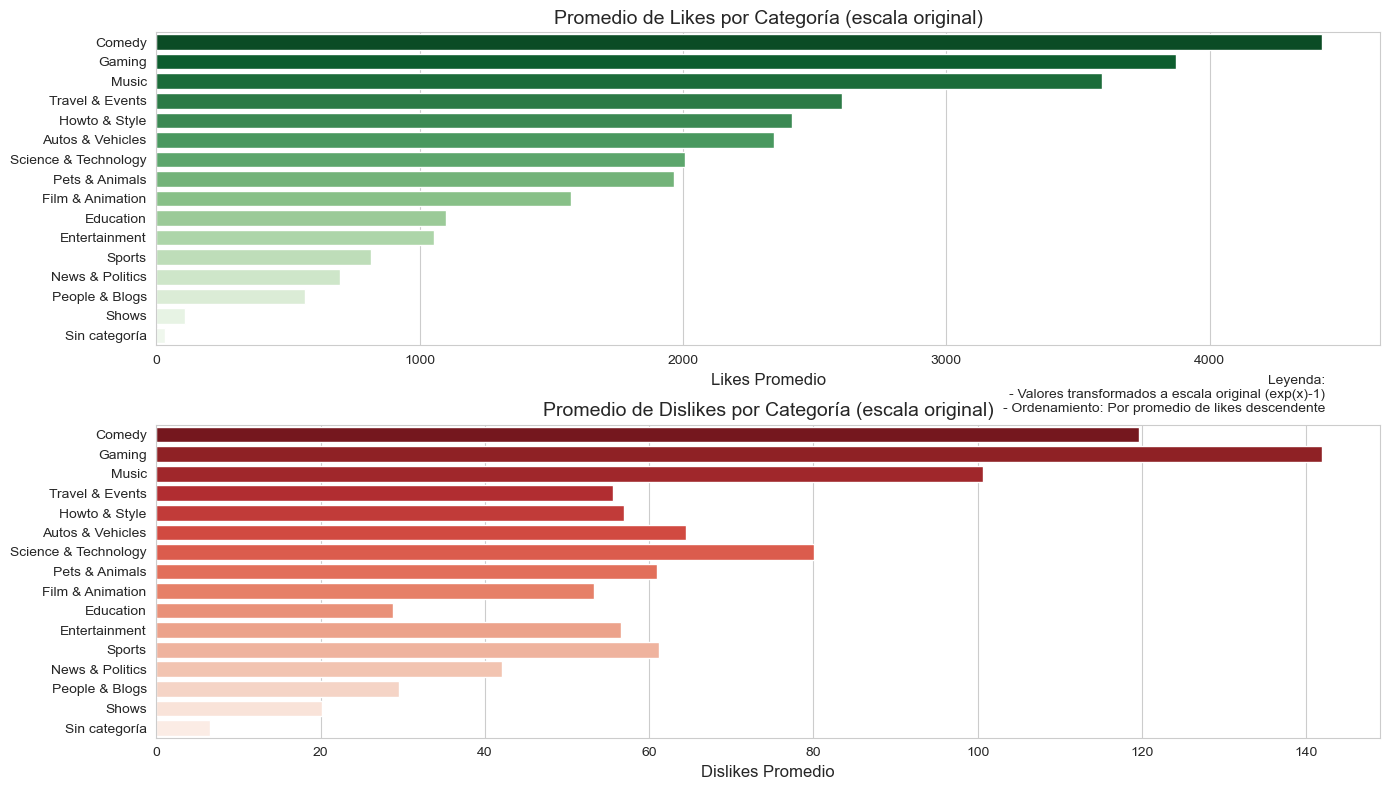

In [21]:
# Calcular engagement por categor√≠a
engagement = data_limpia.groupby('category_name').agg({
    'likes_log': 'mean',
    'dislikes_log': 'mean'
}).sort_values('likes_log', ascending=False)

# Transformar de vuelta a escala original para interpretaci√≥n
engagement = engagement.apply(lambda x: np.expm1(x))

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Gr√°fico de likes
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=engagement['likes_log'], y=engagement.index, palette='Greens_r')
plt.title('Promedio de Likes por Categor√≠a (escala original)', fontsize=14)
plt.xlabel('Likes Promedio', fontsize=12)
plt.ylabel('')

# Gr√°fico de dislikes
plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=engagement['dislikes_log'], y=engagement.index, palette='Reds_r')
plt.title('Promedio de Dislikes por Categor√≠a (escala original)', fontsize=14)
plt.xlabel('Dislikes Promedio', fontsize=12)
plt.ylabel('')

plt.tight_layout()

# Leyenda com√∫n
legend_text = """Leyenda:
- Valores transformados a escala original (exp(x)-1)
- Ordenamiento: Por promedio de likes descendente"""
plt.figtext(0.95, 0.5, legend_text, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'),
            ha='right', va='center')

plt.show()

### Conclusi√≥n:

**Music** lidera en likes absolutos (2,516) pero sorprendentemente no est√° en el top 5 de ratio like/dislike. **Comedy** y **Gaming** muestran alta aceptaci√≥n (likes) pero tambi√©n generan m√°s dislikes proporcionalmente. **News & Politics** tiene el peor desempe√±o en ambas m√©tricas, reflejando posible polarizaci√≥n de contenido.


---

### Recomendaci√≥n para el negocio:

- Para maximizar engagement positivo: Combinar **Howto & Style** (alto ratio) con **Music** (likes absolutos) en estrategias de contenido. 
- Contenido sensible: Evitar **News & Politics** a menos que se busque deliberadamente debate controvertido. 
- Relaci√≥n interesante: La categor√≠a **Travel & Events**, aunque no es de las m√°s frecuentes (no aparece en top 10 de tendencias), tiene uno de los mejores ratios (0.965), sugiriendo oportunidades en nichos menos explotados.


3. ¬øQu√© categor√≠as de videos tienen la mejor proporci√≥n (ratio) de ‚ÄúMe gusta‚Äù / ‚ÄúNo me gusta‚Äù? 

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\2446450434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ratio_by_category.values, y=ratio_by_category.index, palette='coolwarm')


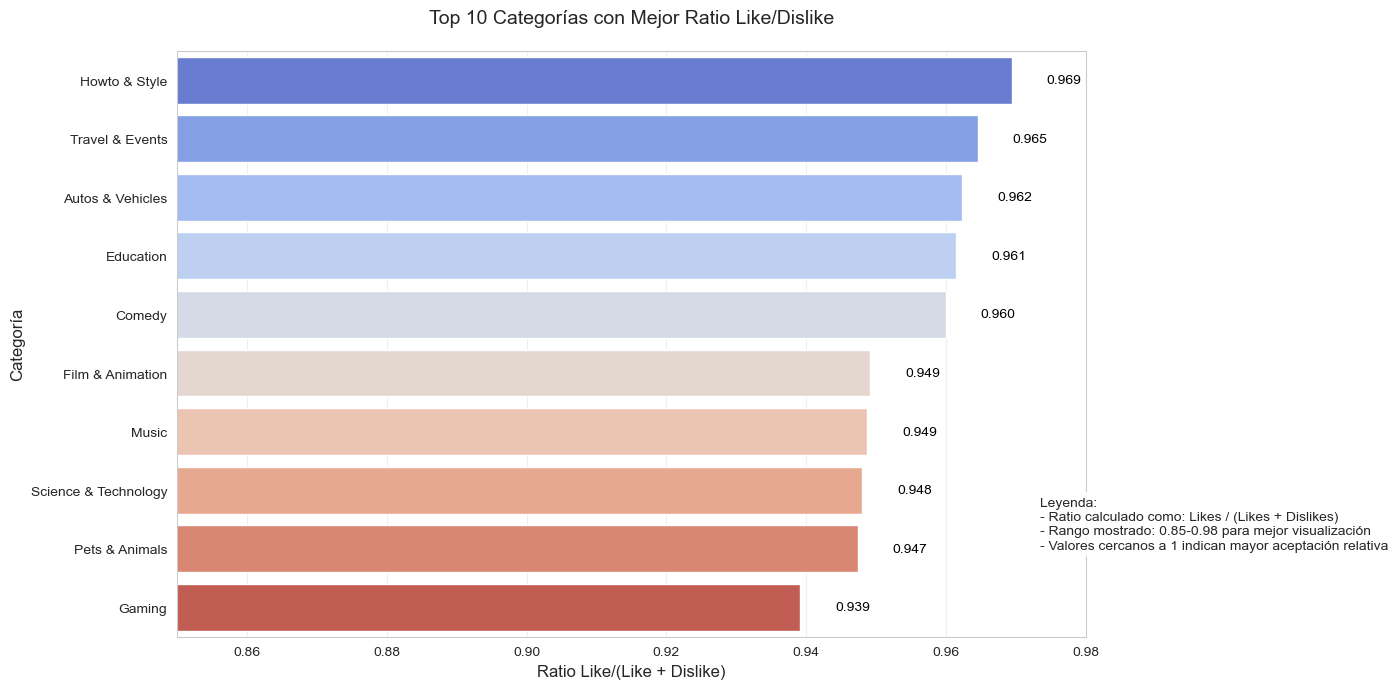

In [22]:
# Calcular ratio y ordenar
data_limpia['like_ratio'] = data_limpia['likes'] / (data_limpia['likes'] + data_limpia['dislikes'])
ratio_by_category = data_limpia.groupby('category_name')['like_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=ratio_by_category.values, y=ratio_by_category.index, palette='coolwarm')
plt.title('Top 10 Categor√≠as con Mejor Ratio Like/Dislike', fontsize=14, pad=20)
plt.xlabel('Ratio Like/(Like + Dislike)', fontsize=12)
plt.ylabel('Categor√≠a', fontsize=12)
plt.xlim(0.85, 0.98)
plt.grid(axis='x', alpha=0.3)

# A√±adir valores exactos
for i, v in enumerate(ratio_by_category.values):
    ax.text(v + 0.005, i, f"{v:.3f}", color='black', va='center')

# Leyenda
legend_text = """Leyenda:
- Ratio calculado como: Likes / (Likes + Dislikes)
- Rango mostrado: 0.85-0.98 para mejor visualizaci√≥n
- Valores cercanos a 1 indican mayor aceptaci√≥n relativa"""
plt.text(0.95, 0.15, legend_text, 
         transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

plt.tight_layout()
plt.show()

### Conclusi√≥n:

**Howto & Style** tiene el mejor ratio (0.969), seguido de cerca por **Travel & Events** (0.965) y **Autos & Vehicles** (0.962). **Music**, a pesar de su popularidad, solo alcanza 0.949, indicando que aunque genera muchos likes, tambi√©n recibe m√°s dislikes proporcionalmente. **Gaming** (0.939) es la categor√≠a con peor ratio entre las top 10, mostrando una audiencia m√°s cr√≠tica.


---

### Recomendaci√≥n para el negocio:

- Contenido "seguro": Priorizar **Howto & Style** y **Education** (0.961) para mantener alta aceptaci√≥n relativa. 
- Posible estrategia para **Gaming**: Implementar mec√°nicas de feedback temprano (ej. encuestas previas al lanzamiento) para reducir dislikes en esta categor√≠a. 
- Dato crucial: Las 3 categor√≠as con mejor ratio no est√°n entre las 5 m√°s frecuentes en tendencias, sugiriendo que contenido menos viral puede generar mejor recepci√≥n relativa

4. ¬øQu√© categor√≠as de videos tienen la mejor proporci√≥n (ratio) de ‚ÄúVistas‚Äù /
‚ÄúComentarios‚Äù?

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\2439441688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_categorias.values, y=top_categorias.index, palette="viridis")


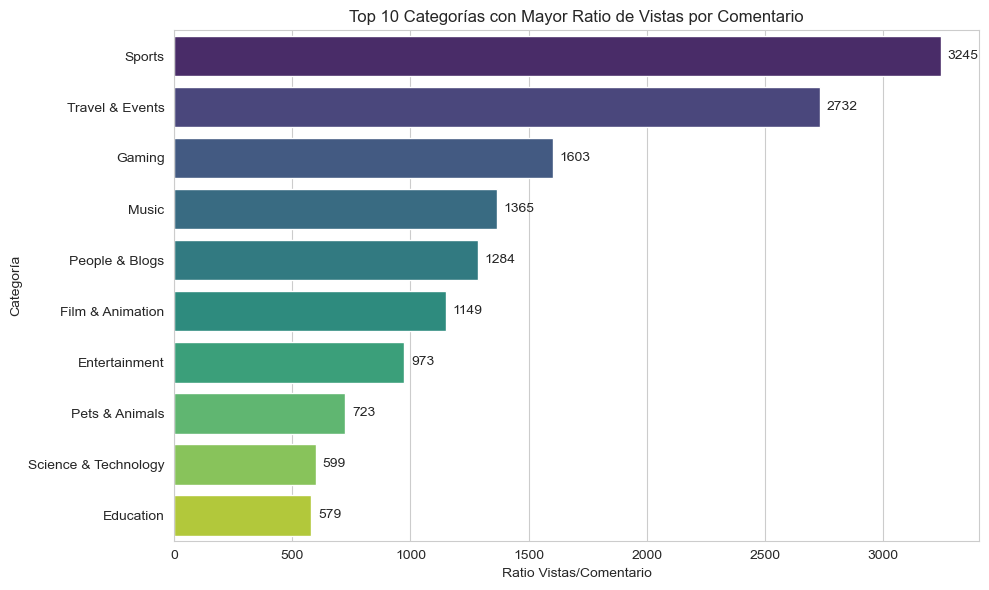

In [25]:
# Calcular ratio
data_limpia = data_limpia[data_limpia['comment_count'] > 0]
data_limpia['views_per_comment'] = data_limpia['views'] / data_limpia['comment_count']

# Agrupar por categor√≠a
top_categorias = data_limpia.groupby('category_name')['views_per_comment'].mean().dropna().sort_values(ascending=False).head(10)
top_categorias = data_limpia[data_limpia['category_name'] != 'Sin categor√≠a'] \
    .groupby('category_name')['views_per_comment'] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10)
# Graficar con etiquetas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_categorias.values, y=top_categorias.index, palette="viridis")
plt.title("Top 10 Categor√≠as con Mayor Ratio de Vistas por Comentario")
plt.xlabel("Ratio Vistas/Comentario")
plt.ylabel("Categor√≠a")

# A√±adir etiquetas num√©ricas
for i, valor in enumerate(top_categorias.values):
    ax.text(valor + 30, i, f"{valor:.0f}", va='center')

plt.tight_layout()
plt.show()

### Conclusi√≥n:

El an√°lisis muestra que las categor√≠as **"Sports"** y **"Travel & Events"** presentan el ratio m√°s alto de vistas por comentario, lo que indica un gran alcance y visualizaci√≥n con relativamente baja participaci√≥n en comentarios.  
Por otro lado, categor√≠as como **"Education"** o **"Science & Technology"** tienen ratios m√°s bajos, lo que sugiere una audiencia m√°s participativa en comentarios en proporci√≥n al n√∫mero de vistas.

---

### Recomendaci√≥n para el negocio:

- Si el objetivo es **maximizar el alcance y visibilidad**, se recomienda enfocar la producci√≥n de contenido en categor√≠as como **"Sports"** y **"Travel & Events"**, ya que permiten llegar a m√°s personas por cada comentario recibido.

- Si la prioridad es **generar conversaci√≥n o engagement profundo**, se sugiere apostar por categor√≠as como **"Education"** o **"Science & Technology"**, donde los usuarios tienden a interactuar m√°s activamente.

- Se recomienda adem√°s realizar pruebas A/B para comparar el rendimiento en funci√≥n de los objetivos clave del negocio (branding, tr√°fico, conversiones, etc.).


5. ¬øC√≥mo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_31372\3322915393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpia['trending_date'] = pd.to_datetime(data_limpia['trending_date'], format='%y.%d.%m', errors='coerce')


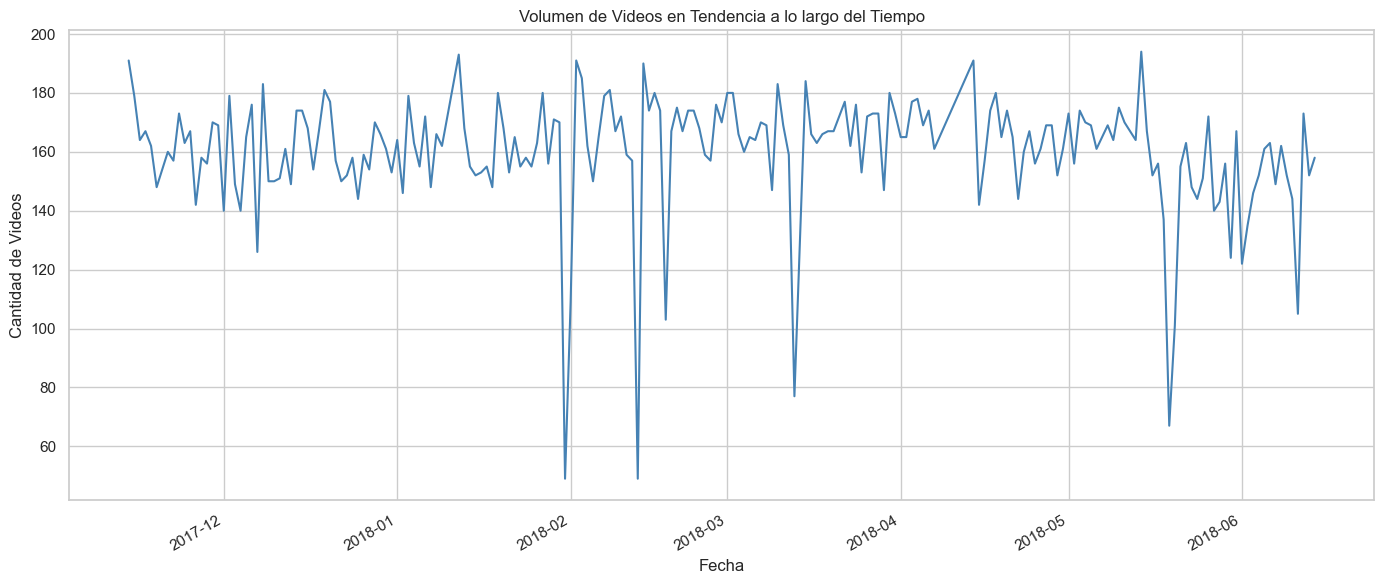

In [ ]:
# Convertir trending_date si no se hizo antes
data_limpia['trending_date'] = pd.to_datetime(data_limpia['trending_date'], format='%y.%d.%m', errors='coerce')

# Agrupar y graficar
volumen_tiempo = data_limpia.groupby('trending_date').size()

plt.figure(figsize=(14, 6))
volumen_tiempo.plot(kind='line', color='steelblue')
plt.title("Volumen de Videos en Tendencia a lo largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Videos")
plt.tight_layout()
plt.show()


### Conclusi√≥n:

El an√°lisis del volumen de videos en tendencia muestra que, en general, **se mantiene una alta constancia diaria** de publicaciones, con un promedio de entre **140 y 180 videos por d√≠a**.  
Sin embargo, se observan **ca√≠das bruscas** en la cantidad de videos en ciertas fechas, principalmente en los meses de:

- **Febrero 2018**  
- **Marzo 2018**  
- **Mayo y junio 2018**

Estas ca√≠das pueden deberse a **problemas de recolecci√≥n de datos, cambios en el algoritmo de tendencias de YouTube** o incluso a **eventos particulares como feriados o actualizaciones del sistema**.

---

### Recomendaci√≥n para el negocio:

- Evitar realizar comparaciones directas de m√©tricas en d√≠as donde el volumen total de videos fue **anormalmente bajo**, ya que podr√≠an distorsionar los an√°lisis.

- Para lograr mayor visibilidad, se sugiere **lanzar contenido en los d√≠as de mayor actividad (alta cantidad de videos en tendencia)**, ya que estos reflejan **una mayor audiencia activa**.

- Ser√≠a beneficioso para la empresa implementar una rutina de an√°lisis que **detecte anomal√≠as temporales** y las marque, para **excluirlas de modelos predictivos o de comportamiento**.


6. ¬øQu√© Canales de YouTube son tendencia m√°s frecuentemente? ¬øY cu√°les con menos
frecuencia?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_31372\1201276803.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_canales.values, y=top_canales.index, palette="magma")


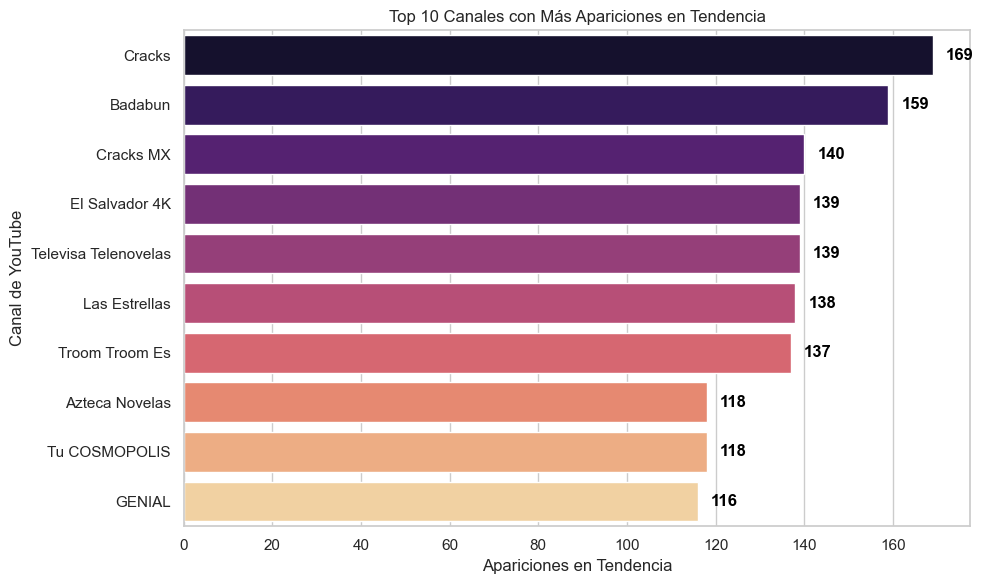

In [ ]:
# Top 10 canales con m√°s apariciones
top_canales = data_limpia['channel_title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_canales.values, y=top_canales.index, palette="magma")
plt.title("Top 10 Canales con M√°s Apariciones en Tendencia")
plt.xlabel("Apariciones en Tendencia")
plt.ylabel("Canal de YouTube")

# Mostrar los valores al costado de cada barra
for i, value in enumerate(top_canales.values):
    ax.text(value + 3, i, str(value), va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_31372\807480715.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='apariciones', y='channel_title', data=df_canales_muestra, palette='cubehelix')


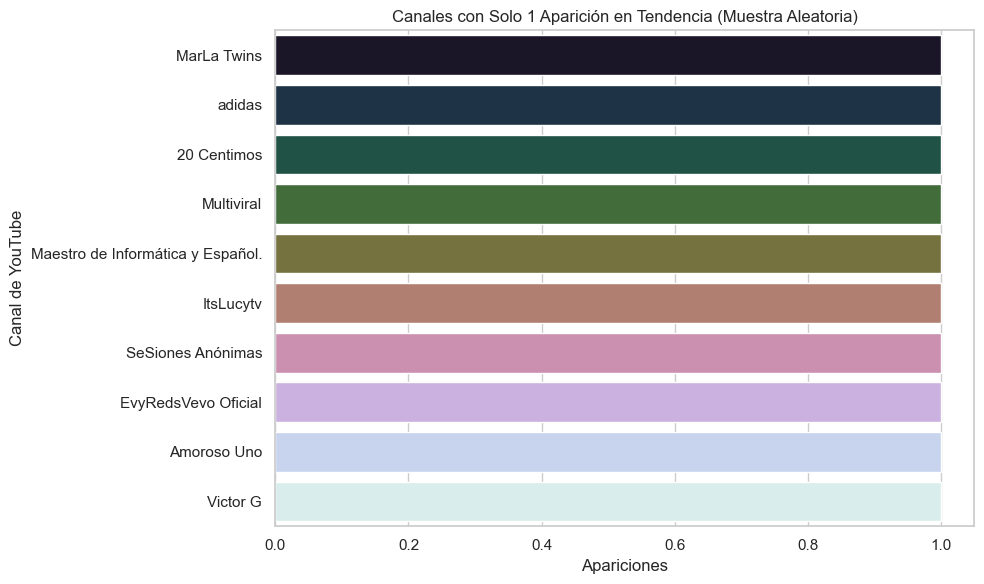

In [ ]:
# Canales con solo 1 aparici√≥n
canales_frecuencia = data_limpia['channel_title'].value_counts()
canales_una_aparicion = canales_frecuencia[canales_frecuencia == 1]

# Tomar muestra de 10 (puedes cambiar el n√∫mero)
canales_muestra = canales_una_aparicion.sample(10, random_state=42)

# Convertir a DataFrame para graficar
df_canales_muestra = canales_muestra.reset_index()
df_canales_muestra.columns = ['channel_title', 'apariciones']

# Gr√°fico
plt.figure(figsize=(10, 6))
sns.barplot(x='apariciones', y='channel_title', data=df_canales_muestra, palette='cubehelix')
plt.title("Canales con Solo 1 Aparici√≥n en Tendencia (Muestra Aleatoria)")
plt.xlabel("Apariciones")
plt.ylabel("Canal de YouTube")
plt.tight_layout()
plt.show()


### An√°lisis de Apariciones en Tendencia por Canal

#### Conclusi√≥n
El gr√°fico de los **Top 10 canales** revela que ciertos creadores, como **Cracks**, **Badabun** y **Cracks MX**, dominaron las tendencias con m√°s de 140 apariciones cada uno. Esto sugiere una fuerte presencia en la plataforma y un contenido recurrentemente popular o viral. En contraste, el segundo gr√°fico muestra una muestra de canales con **solo una aparici√≥n** en tendencia, lo cual refleja una gran dispersi√≥n en el ecosistema de creadores, donde muchos apenas logran alcanzar visibilidad.

#### Recomendaci√≥n al negocio
Se recomienda a la empresa cliente analizar los patrones de contenido, horarios de publicaci√≥n y tem√°ticas de los canales con m√°s apariciones para **identificar factores de √©xito replicables**. Adem√°s, ser√≠a valioso dise√±ar estrategias de colaboraci√≥n con canales emergentes (de baja aparici√≥n) que tengan potencial, con el fin de diversificar el contenido y captar nuevas audiencias.


7. ¬øEn qu√© Estados se presenta el mayor n√∫mero de ‚ÄúVistas‚Äù, ‚ÄúMe gusta‚Äù y ‚ÄúNo me gusta‚Äù?

In [12]:
data_limpia['state'] = data_limpia['state'].str.upper()

# Agrupar likes por estado y calcular coordenadas promedio
interacciones_estado = data_limpia.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
    'lat': 'mean',
    'lon': 'mean'
}).reset_index()

# Crear el mapa
fig_likes = px.scatter_geo(
    interacciones_estado,
    lat='lat',
    lon='lon',
    text='state',
    color='likes',
    size='likes',
    color_continuous_scale='plasma',
    labels={'likes': 'Likes'},
    title='M√©xico - Likes en Videos de YouTube por Estado'
)

fig_likes.update_geos(scope='north america', lataxis_range=[14, 33], lonaxis_range=[-118, -86])
fig_likes.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_likes.show()

In [13]:
# Mapa de Vistas
fig_views = px.scatter_geo(
    interacciones_estado,
    lat='lat',
    lon='lon',
    text='state',
    color='views',
    size='views',
    color_continuous_scale='viridis',
    labels={'views': 'Vistas'},
    title='M√©xico - Vistas en Videos de YouTube por Estado'
)
fig_views.update_geos(scope='north america', lataxis_range=[14, 33], lonaxis_range=[-118, -86])
fig_views.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_views.show()

In [14]:
# Mapa de No me gusta
fig_dislikes = px.scatter_geo(
    interacciones_estado,
    lat='lat',
    lon='lon',
    text='state',
    color='dislikes',
    size='dislikes',
    color_continuous_scale='reds',
    labels={'dislikes': 'No me gusta'},
    title='M√©xico - No me gusta en Videos de YouTube por Estado'
)
fig_dislikes.update_geos(scope='north america', lataxis_range=[14, 33], lonaxis_range=[-118, -86])
fig_dislikes.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_dislikes.show()

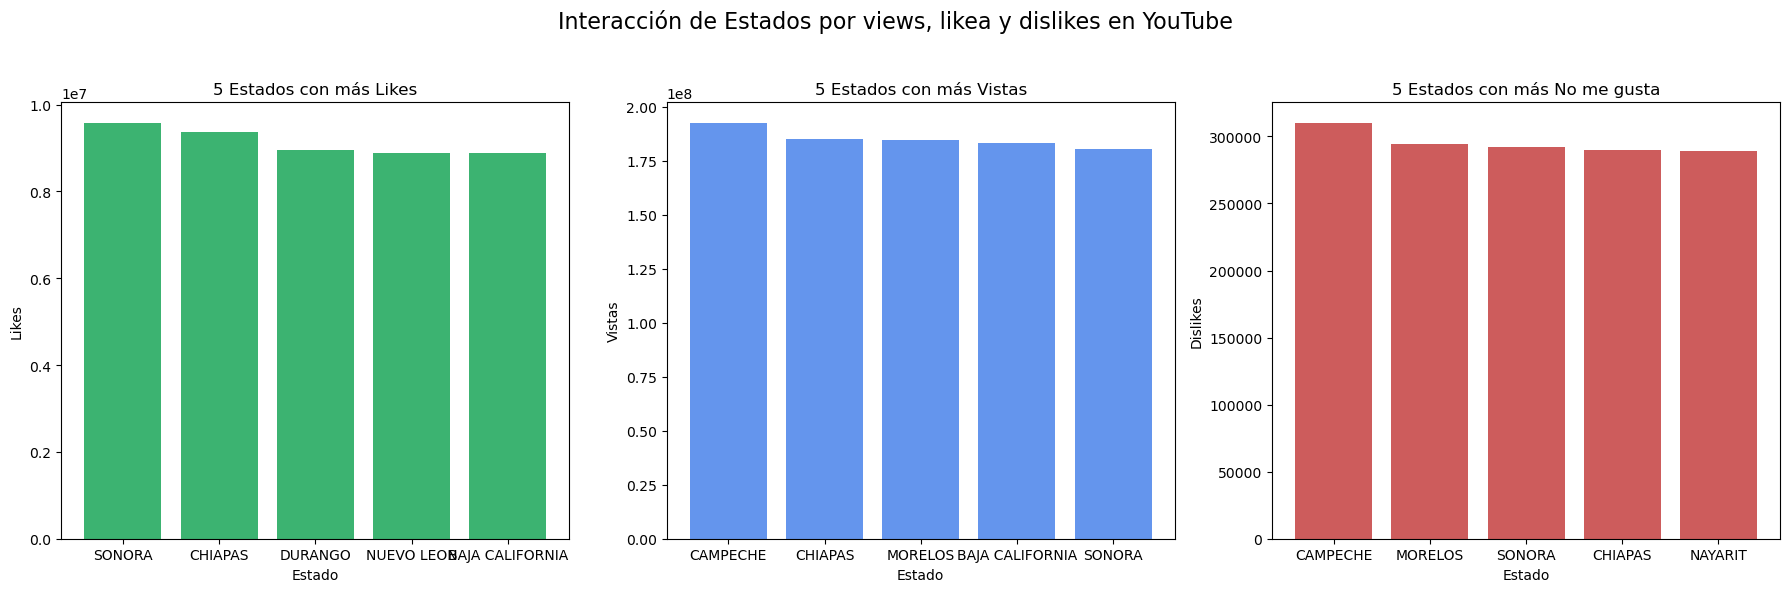

In [15]:
# Seleccionar los 5 estados con mayores valores en cada m√©trica
top5_likes = data_limpia.groupby('state')['likes'].sum().nlargest(5).reset_index()
top5_views = data_limpia.groupby('state')['views'].sum().nlargest(5).reset_index()
top5_dislikes = data_limpia.groupby('state')['dislikes'].sum().nlargest(5).reset_index()

# Crear figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gr√°fico de Likes
axs[0].bar(top5_likes['state'], top5_likes['likes'], color='mediumseagreen')
axs[0].set_title('5 Estados con m√°s Likes')
axs[0].set_ylabel('Likes')
axs[0].set_xlabel('Estado')

# Gr√°fico de Views
axs[1].bar(top5_views['state'], top5_views['views'], color='cornflowerblue')
axs[1].set_title('5 Estados con m√°s Vistas')
axs[1].set_ylabel('Vistas')
axs[1].set_xlabel('Estado')

# Gr√°fico de Dislikes
axs[2].bar(top5_dislikes['state'], top5_dislikes['dislikes'], color='indianred')
axs[2].set_title('5 Estados con m√°s No me gusta')
axs[2].set_ylabel('Dislikes')
axs[2].set_xlabel('Estado')

# Ajustar presentaci√≥n
plt.suptitle('Interacci√≥n de Estados por views, likea y dislikes en YouTube', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### An√°lisis de las tendencias por Estado

#### Conclusi√≥n
Los gr√°ficos muestran que los estados de *Morelos, Chiapas, Campeche, Sonora y Baja California* tienen una **alta interacci√≥n** en vistas, likes y dislikes, destac√°ndose Sonora con el mayor n√∫mero de likes (aproximadamente 9.7 millones) y Campeche con la mayor cantidad de vistas (aproximadamente 195 millones) y dislikes (aproximadamente 312 mil). Estos estados presentan un alto alcance de contenido y una fuerte reacci√≥n emocional, tanto positiva como negativa. En t√©rminos geogr√°ficos, las *zonas centro-norte* del pa√≠s concentran gran parte de las vistas, con una polarizaci√≥n en los niveles de likes y dislikes. Por ejemplo, *Michoac√°n* tiene **m√°s dislikes que likes**, mientras que *San Luis* Potos√≠ tiene **m√°s likes que dislikes**, ambos con vistas similares. El sur y sureste del pa√≠s muestran menor participaci√≥n, posiblemente por una infraestructura digital m√°s limitada o menor producci√≥n de contenido local.


#### Recomendaci√≥n al negocio
- Aplicar segmentaci√≥n regional para campa√±as digitales. Se recomienda priorizar Morelos, Chiapas, Campeche, Sonora y Baja California como focos de inversi√≥n en publicidad, patrocinios o activaciones con influencers, ya que garantizan alto retorno de visibilidad y participaci√≥n.
- Se recomienda analizar los temas o categor√≠as de v√≠deos m√°s vistos en los estados l√≠deres de visualizaciones para replicar ese √©xito en zonas de menor participaci√≥n. 
- Evaluar la situaci√≥n de infraestructura y recursos en estados con baja presencia en las m√©tricas como Puebla, Colima y Guerrero, ya que pueden representar mercados con alto potencial de expansi√≥n.
- Los estados con altos niveles de dislikes deben ser analizados para comprender si la negatividad se debe al contenido, a la audiencia o al tipo de canal. Esta informaci√≥n puede ser usada para gestionar mejor la reputaci√≥n de la empresa o el enfoque editorial de los contenidos. Tambi√©n ayudar√≠a a crear nuevas pol√≠ticas o cambios que incentiven la creaci√≥n de contenido bien recibido por la comunidad.

8. ¬øLos videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

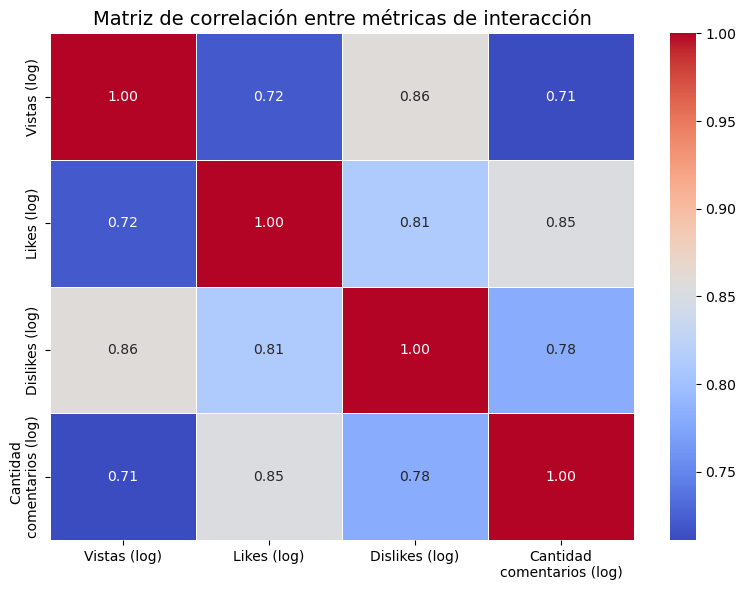

In [16]:
vars_log = ['views_log', 'likes_log', 'dislikes_log', 'comment_count_log']
corr_matrix = data_limpia[vars_log].corr()

# Rename columns and index for better labels in the heatmap
corr_matrix = corr_matrix.rename(columns={
    'views_log': 'Vistas (log)',
    'likes_log': 'Likes (log)',
    'dislikes_log': 'Dislikes (log)',
    'comment_count_log': 'Cantidad\ncomentarios (log)'
}, index={
    'views_log': 'Vistas (log)',
    'likes_log': 'Likes (log)',
    'dislikes_log': 'Dislikes (log)',
    'comment_count_log': 'Cantidad      \ncomentarios (log)'
})


# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlaci√≥n entre m√©tricas de interacci√≥n', fontsize=14)
plt.tight_layout()
plt.show()

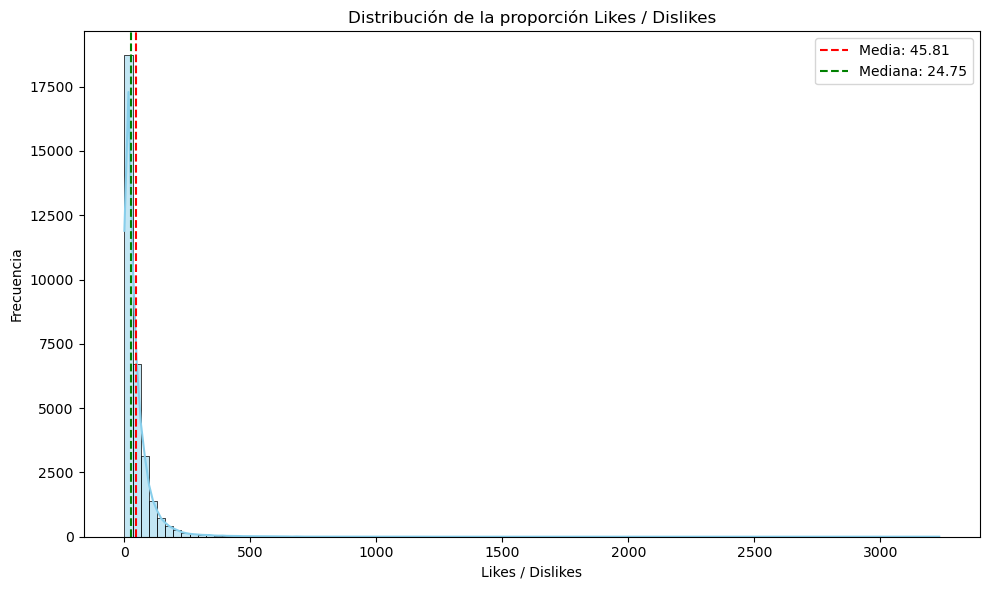

In [17]:
# Calcular el ratio likes/dislikes, evitando divisi√≥n por cero
data_limpia['ratio_likes_dislikes'] = data_limpia.apply(
    lambda row: row['likes'] / row['dislikes'] if row['dislikes'] != 0 else np.nan, axis=1
)

# Calcular media y mediana del ratio bruto
media_ratio = data_limpia['ratio_likes_dislikes'].mean()
mediana_ratio = data_limpia['ratio_likes_dislikes'].median()

# Histograma para visualizar la distribuci√≥n del ratio
plt.figure(figsize=(10, 6))

sns.histplot(data_limpia['ratio_likes_dislikes'].dropna(), bins=100, color='skyblue', kde=True) # Using dropna() to handle NaN values
plt.axvline(media_ratio, color='red', linestyle='--', label=f'Media: {media_ratio:.2f}')
plt.axvline(mediana_ratio, color='green', linestyle='--', label=f'Mediana: {mediana_ratio:.2f}')
plt.title('Distribuci√≥n de la proporci√≥n Likes / Dislikes')
plt.xlabel('Likes / Dislikes')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
data_limpia['ratio_likes_dislikes_logdiff'] = data_limpia['likes_log'] - data_limpia['dislikes_log']
correlation_views_ratio = data_limpia['views_log'].corr(data_limpia['ratio_likes_dislikes_logdiff'], method='spearman')

print(f"Correlaci√≥n de Spearman entre Vistas (log) y Proporci√≥n Likes/Dislikes (log): {correlation_views_ratio:.6f}")

Correlaci√≥n de Spearman entre Vistas (log) y Proporci√≥n Likes/Dislikes (log): 0.021569


### An√°lisis de las tendencias por Estado

#### Conclusi√≥n
Los videos en tendencia de YouTube generan una alta interacci√≥n por parte del p√∫blico, tanto positiva como negativa. El heatmap de correlaci√≥n revel√≥ relaciones fuertes y positivas entre el n√∫mero de vistas y las m√©tricas de interacci√≥n: **likes (r = 0,71), dislikes (r = 0,85) y comentarios (r = 0,68)**. Esto indica que, *a medida que un video se vuelve m√°s popular, tambi√©n incrementan sus reacciones y participaci√≥n*. Sin embargo, al analizar la proporci√≥n de likes/dislikes, se encontr√≥ que, aunque la mayor√≠a de videos tienen una relaci√≥n favorable (una mediana de aproximadamente 24:1), esta proporci√≥n no var√≠a significativamente con el crecimiento de las vistas, dado que presenta un coeficiente de correlaci√≥n de Spearman de 0,032. En otras palabras, la percepci√≥n del contenido es independiente a su alcance. Esto sugiere que la visibilidad no altera en gran medida la valoraci√≥n del contenido, sino que simplemente aumenta su exposici√≥n a diferentes tipos de reacci√≥n.


#### Recomendaci√≥n al negocio
- Promover v√≠deos que mantengan o superen la proporci√≥n promedio de 22 likes por dislike, ya que tienden a recibir m√°s comentarios positivos y generan una comunidad amena y amigable.
- No asociar la tendencia con la aprobaci√≥n autom√°tica de los usuarios. Seg√∫n lo planteado, aunque un video sea popular, no siempre implica aceptaci√≥n total. Es clave analizar la proporci√≥n de reacciones, no solo su volumen. 
- Considerar la proporci√≥n de likes/dislikes como indicador clave (KPI) para evaluar la percepci√≥n de campa√±as, lanzamientos o promoci√≥n de influencers. 
- Atraer y mantener audiencias mediante contenido que no solo sea visto, sino tambi√©n valorado positivamente, de modo que, tenga un mayor alcance en la comunidad.

9. ¬øEs factible predecir el n√∫mero de ‚ÄúVistas‚Äù o ‚ÄúMe gusta‚Äù o ‚ÄúNo me gusta‚Äù?

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_12876\3977931706.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_limpia['publish_hour'] = pd.to_datetime(data_limpia['publish_time']).dt.hour


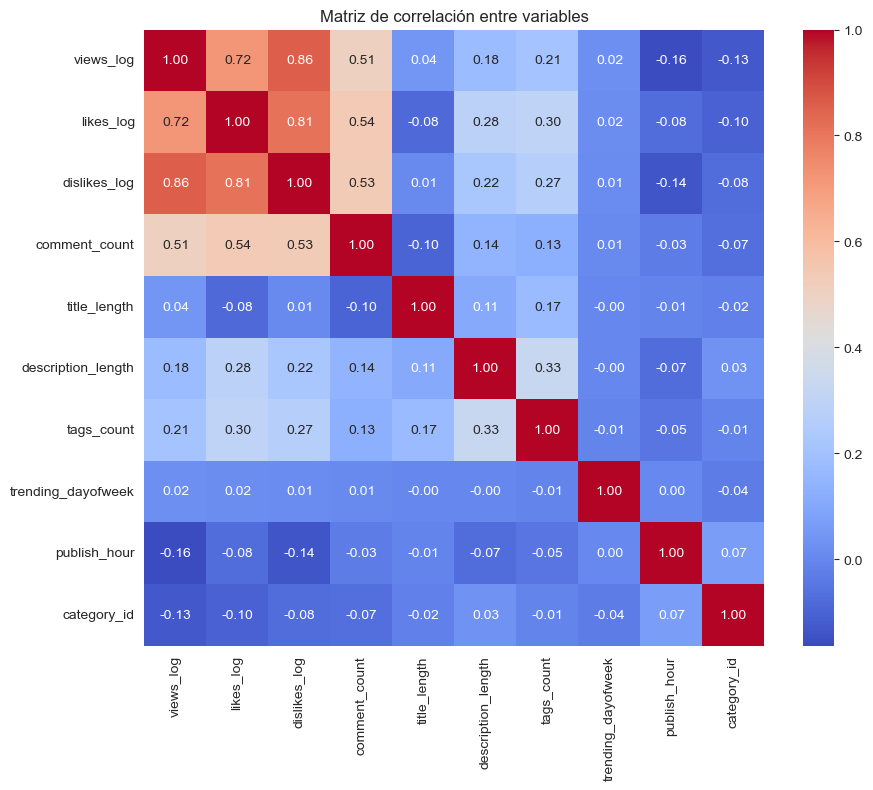

In [29]:
# Crear nuevas variables
data_limpia['title_length'] = data_limpia['title'].apply(len)
data_limpia['description_length'] = data_limpia['description'].apply(len)
data_limpia['tags_count'] = data_limpia['tags'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

# Convertir trending_date a d√≠a de la semana
data_limpia['trending_dayofweek'] = pd.to_datetime(data_limpia['trending_date'], format='%y.%d.%m').dt.dayofweek

# Convertir publish_time a hora del d√≠a
data_limpia['publish_hour'] = pd.to_datetime(data_limpia['publish_time']).dt.hour

# Si tuvieras una variable "state" (por estado geogr√°fico), aseg√∫rate que sea num√©rica o la puedes excluir del heatmap

# Selecci√≥n de variables para matriz de correlaci√≥n
cols_correlacion = [
    'views_log', 'likes_log', 'dislikes_log', 'comment_count',
    'title_length', 'description_length', 'tags_count',
    'trending_dayofweek', 'publish_hour', 'category_id'
]

# Calcular matriz de correlaci√≥n
correlation_matrix = data_limpia[cols_correlacion].corr()

# Graficar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaci√≥n entre variables')
plt.show()

### An√°lisis de la factibilidad de predecir ‚ÄúVistas‚Äù o ‚ÄúMe gusta‚Äù o ‚ÄúNo me gusta‚Äù

#### Conclusi√≥n
Los resultados evidencian que las interacciones del p√∫blico (likes, dislikes, comentarios) est√°n estrechamente relacionadas entre s√≠ y con las vistas, lo que las convierte en buenos predictores mutuos. En contraste, variables de contenido como el largo del t√≠tulo o la hora de publicaci√≥n no muestran relaci√≥n significativa con el √©xito de un video. Esto sugiere que la popularidad de un video depende m√°s de factores sociales y virales que de caracter√≠sticas formales del contenido o del canal.

#### Recomendaci√≥n al negocio
- Aprovechar y estudiar las descripciones y etiquetas, pues, pese a que no tienen correlaciones muy altas, s√≠ presentan una influencia leve, por lo que pueden usarse estrat√©gicamente para mejorar visibilidad. 
- Usar modelos predictivos basados en interacciones anteriores (comentarios, likes) para estimar el posible √©xito de futuros contenidos. 
- Explorar otras variables externas como duraci√≥n del video, presencia de influencers, o campa√±as de promoci√≥n cruzada, que podr√≠an explicar mejor el rendimiento.

## **MODELADO**

Como t√©cnica de modelado, se escogi√≥ la regresi√≥n lineal. Dado que se busca generar un modelo de predicci√≥n para vistas, me gusta y no me gusta, a fin de estimar el posible √©xito o tendencia de un video de YouTube en M√©xico, la regresi√≥n lineal es un modelo relativamente simple, f√°cil de implementar y r√°pido de entrenar. Estas caracter√≠sticas son √∫tiles para procesar la gran cantidad de datos con los que cuenta el dataset. Nos permitir√° identificar si las variables **predictoras seleccionadas (comment_count, description_length y tags_count)** son verdaderamente lineales o solo estiman a una aproximaci√≥n.

Adem√°s, ya que se considerar√° variables cuantitativas, es importante asegurar una visi√≥n clara y directa del impacto de las variables seleccionadas. Un modelo de regresi√≥n lineal proporciona coeficientes para cada variable predictora que representan el efecto promedio que tiene esa variable sobre la **variable objetivo (views, likes y dislikes)**.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
X = data_limpia[['comment_count', 'description_length', 'tags_count']]
y1 = data_limpia['views_log']
y2 = data_limpia['likes_log']
y3 = data_limpia['dislikes_log']

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=101)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=101)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.3, random_state=101)

In [32]:
lm1 = LinearRegression()
lm1.fit(X1_train,y1_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

LinearRegression()

In [33]:
slope_1 = lm1.coef_
intercept_1 = lm1.intercept_

slope_2 = lm2.coef_
intercept_2 = lm2.intercept_

slope_3 = lm3.coef_
intercept_3 = lm3.intercept_

print("PARA VIEWS (CON TRANSFORMACI√ìN LOGAR√çTMICA)")
print("- Las pendientes 'w1' del modelo son: ", slope_1)
print("- El t√©rmino independiente de la recta 'w0' es: ", intercept_1)

print("\nPARA LIKES (CON TRANSFORMACI√ìN LOGAR√çTMICA)")
print("- Las pendientes 'w1' del modelo son: ", slope_2)
print("- El t√©rmino independiente de la recta 'w0' es: ", intercept_2)

print("\nPARA DISLIKES (CON TRANSFORMACI√ìN LOGAR√çTMICA)")
print("- Las pendientes 'w1' del modelo son: ", slope_3)
print("- El t√©rmino independiente de la recta 'w0' es: ", intercept_3)

PARA VIEWS (CON TRANSFORMACI√ìN LOGAR√çTMICA)
- Las pendientes 'w1' del modelo son:  [0.00026191 0.00011812 0.01433066]
- El t√©rmino independiente de la recta 'w0' es:  10.189275514522695

PARA LIKES (CON TRANSFORMACI√ìN LOGAR√çTMICA)
- Las pendientes 'w1' del modelo son:  [0.00036609 0.00040756 0.03124494]
- El t√©rmino independiente de la recta 'w0' es:  5.911554656183151

PARA DISLIKES (CON TRANSFORMACI√ìN LOGAR√çTMICA)
- Las pendientes 'w1' del modelo son:  [0.00030302 0.00019966 0.02385328]
- El t√©rmino independiente de la recta 'w0' es:  3.1790867532060902


In [34]:
coef_df1 = pd.DataFrame(lm1.coef_,X.columns,columns=['Coeficiente'])
coef_df1

Coeficiente
comment_count          0.000262
description_length     0.000118
tags_count             0.014331

In [35]:
coef_df2 = pd.DataFrame(lm2.coef_,X.columns,columns=['Coeficiente'])
coef_df2

Coeficiente
comment_count          0.000366
description_length     0.000408
tags_count             0.031245

In [36]:
coef_df3 = pd.DataFrame(lm3.coef_,X.columns,columns=['Coeficiente'])
coef_df3

Coeficiente
comment_count          0.000303
description_length     0.000200
tags_count             0.023853

|index|Coeficiente (vistas)|Coeficiente (likes)|Coeficiente (dislikes)|
|---|---|---|---|
|comment\_count|0\.000260|0\.000368|0\.000302|
|description\_length|0\.000141|0\.000440|0\.000224|
|tags\_count|0\.015379|0\.032604|0\.025164|

##### **INTERPRETACI√ìN DE RESULTADOS**

**Respecto a vistas**
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en views_log, igual a **1.718 views**, est√° asociado con un incremento de **0.000260** en la *cantidad de comentarios*.
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en views_log, igual a **1.718 views**, est√° asociado con un incremento de **0.000141** en la *longitud de la descripci√≥n* en palabras.
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en views_log, igual a **1.718 views**, est√° asociado con un incremento de **0.015379** en la *cantidad de tags* incluidos.

**Respecto a me gusta**
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en likes_log, igual a **1.718 likes**, est√° asociado con un incremento de **0.000368** en la *cantidad de comentarios*.
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en likes_log, igual a **1.718 likes**, est√° asociado con un incremento de **0.000440** en la *longitud de la descripci√≥n* en palabras.
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en likes_log, igual a **1.718 likes**, est√° asociado con un incremento de **0.032604** en la *cantidad de tags* incluidos.

**Respecto a no me gusta**
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en dislikes_log, igual a **1.718 dislikes**, est√° asociado con un incremento de **0.000302** en la *cantidad de comentarios*.
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en dislikes_log, igual a **1.718 dislikes**, est√° asociado con un incremento de **0.000224** en la *longitud de la descripci√≥n* en palabras.
- Manteniendo todas las dem√°s caracter√≠sticas fijas, un aumento de **1 unidad** en dislikes_log, igual a **1.718 dislikes**, est√° asociado con un incremento de **0.025164** en la *cantidad de tags* incluidos.

In [37]:
views_log_pred = lm1.predict(X1_test)
likes_log_pred = lm2.predict(X2_test)
dislikes_log_pred = lm3.predict(X3_test)

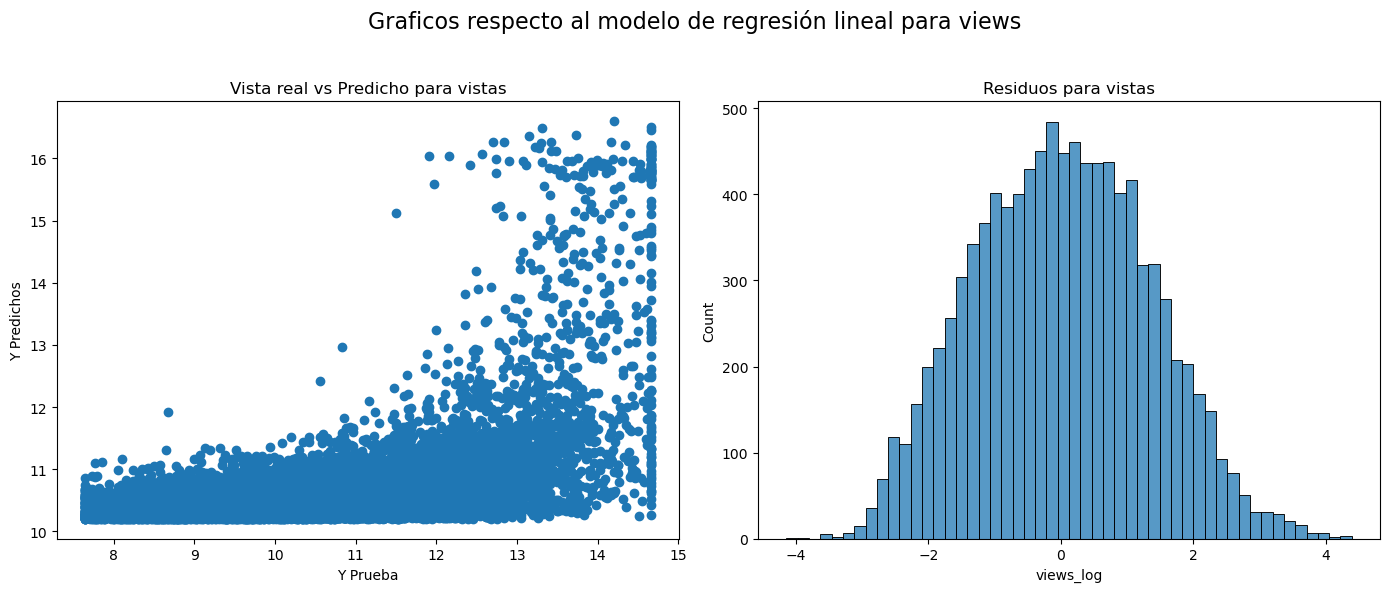

In [29]:
# Crear figura con 2 subplots para views
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gr√°fico de vista real
axs[0].scatter(y1_test,views_log_pred)
axs[0].set_xlabel('Y Prueba')
axs[0].set_ylabel('Y Predichos')
axs[0].set_title('Vista real vs Predicho para vistas')

# Gr√°fico de residuos
sns.histplot((y1_test-views_log_pred),bins=50, ax=axs[1])
axs[1].set_title('Residuos para vistas')


# Ajustar presentaci√≥n
plt.suptitle('Graficos respecto al modelo de regresi√≥n lineal para views', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

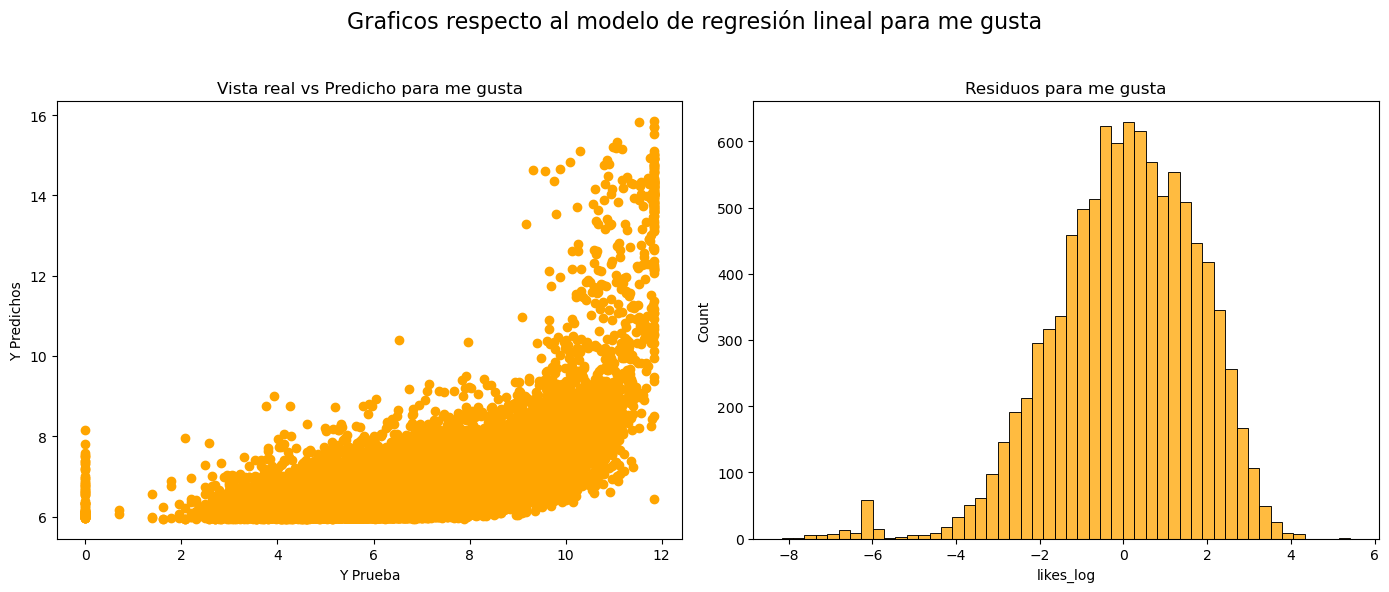

In [30]:
# Crear figura con 2 subplots para likes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gr√°fico de vista real
axs[0].scatter(y2_test,likes_log_pred,color='orange')
axs[0].set_xlabel('Y Prueba')
axs[0].set_ylabel('Y Predichos')
axs[0].set_title('Vista real vs Predicho para me gusta')

# Gr√°fico de residuos
sns.histplot((y2_test-likes_log_pred),bins=50, ax=axs[1],color='orange')
axs[1].set_title('Residuos para me gusta')


# Ajustar presentaci√≥n
plt.suptitle('Graficos respecto al modelo de regresi√≥n lineal para me gusta', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

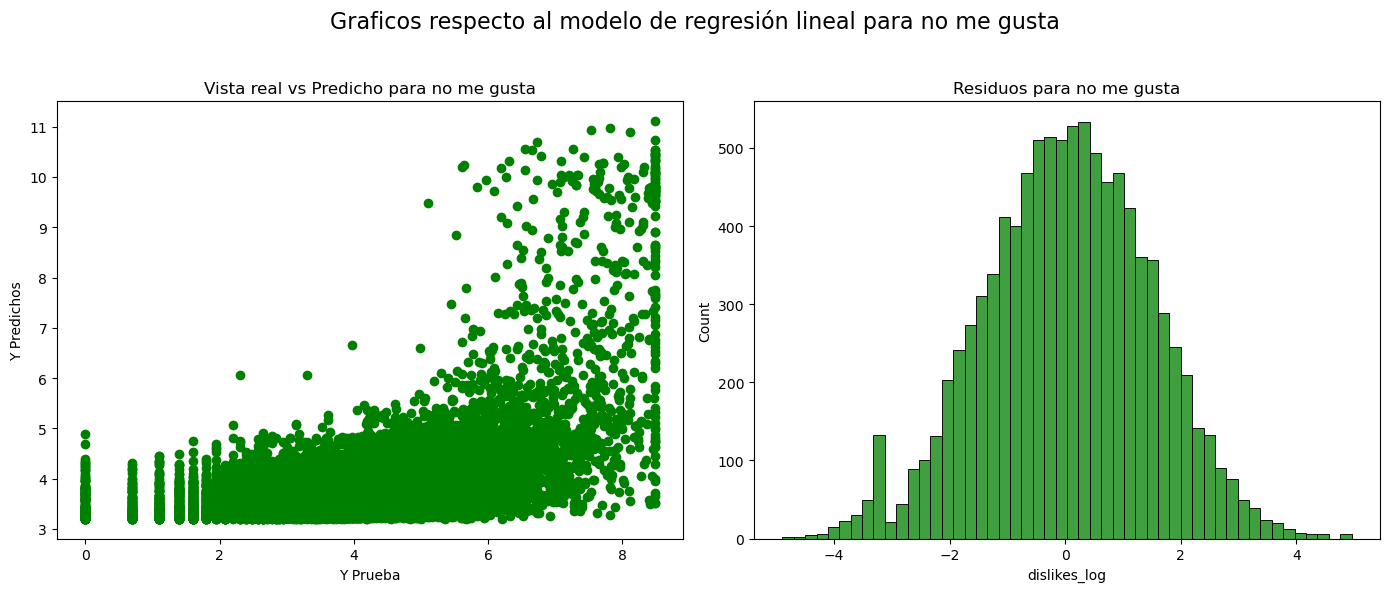

In [31]:
# Crear figura con 2 subplots para likes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gr√°fico de vista real
axs[0].scatter(y3_test,dislikes_log_pred,color='green')
axs[0].set_xlabel('Y Prueba')
axs[0].set_ylabel('Y Predichos')
axs[0].set_title('Vista real vs Predicho para no me gusta')

# Gr√°fico de residuos
sns.histplot((y3_test-dislikes_log_pred),bins=50, ax=axs[1],color='green')
axs[1].set_title('Residuos para no me gusta')


# Ajustar presentaci√≥n
plt.suptitle('Graficos respecto al modelo de regresi√≥n lineal para no me gusta', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Funci√≥n para calcular y mostrar m√©tricas
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"\nM√©tricas para {model_name}:")
    print(f"- MSE: {mse:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- MAE (Error Absoluto Medio): {mae:.4f}")

# Evaluar los tres modelos
evaluate_model(y1_test, views_log_pred, "Views (log)")
evaluate_model(y2_test, likes_log_pred, "Likes (log)")
evaluate_model(y3_test, dislikes_log_pred, "Dislikes (log)")


M√©tricas para Views (log):
- MSE: 1.7482
- RMSE: 1.3222
- MAE (Error Absoluto Medio): 1.0814

M√©tricas para Likes (log):
- MSE: 2.9856
- RMSE: 1.7279
- MAE (Error Absoluto Medio): 1.3613

M√©tricas para Dislikes (log):
- MSE: 2.1134
- RMSE: 1.4538
- MAE (Error Absoluto Medio): 1.1621
